**Kanellaki Maria Anna **

In [254]:
import numpy as np
import cv2
from os import listdir
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import KFold
import numpy.linalg as LA

**Question 1**

1.1. loadImages Function:

In [255]:
def loadImages(path):
    images = []
    seasons = []

    for filename in listdir(path):
        img = cv2.resize(cv2.imread(path+'/'+filename), dsize=(100, 100))
        if img is not None:
            im = np.array(img)
            images.append(im.ravel())
            if filename[0] == 'W':
                n=0
            elif filename[0] == 'S':
                n=1
            else:
                n=2
            seasons.append(n)
    return images, seasons

In [256]:
ims, labels = loadImages("images/images")
imgs = np.array(ims)
labels=np.array(labels)

1.2. PCA_ImageSpaceVisualization Function:

In [257]:
def PCA_ImageSpaceVisualization(images):
    pca = PCA(n_components=2).fit(images)
    components = pca.transform(images)

    plt.figure(figsize=(40,15))
    axes = plt.axes()
    plt.margins(x=0.1,  y=0.3)

    for comps, im_name in zip(components, listdir("images/images")):
        im = plt.imread("images/images/"+im_name)
        im_box = OffsetImage(im, zoom=0.75)

        axes.scatter(comps[0], comps[1])
        a_box = AnnotationBbox(im_box, (comps[0], comps[1]))
        axes.add_artist(a_box)

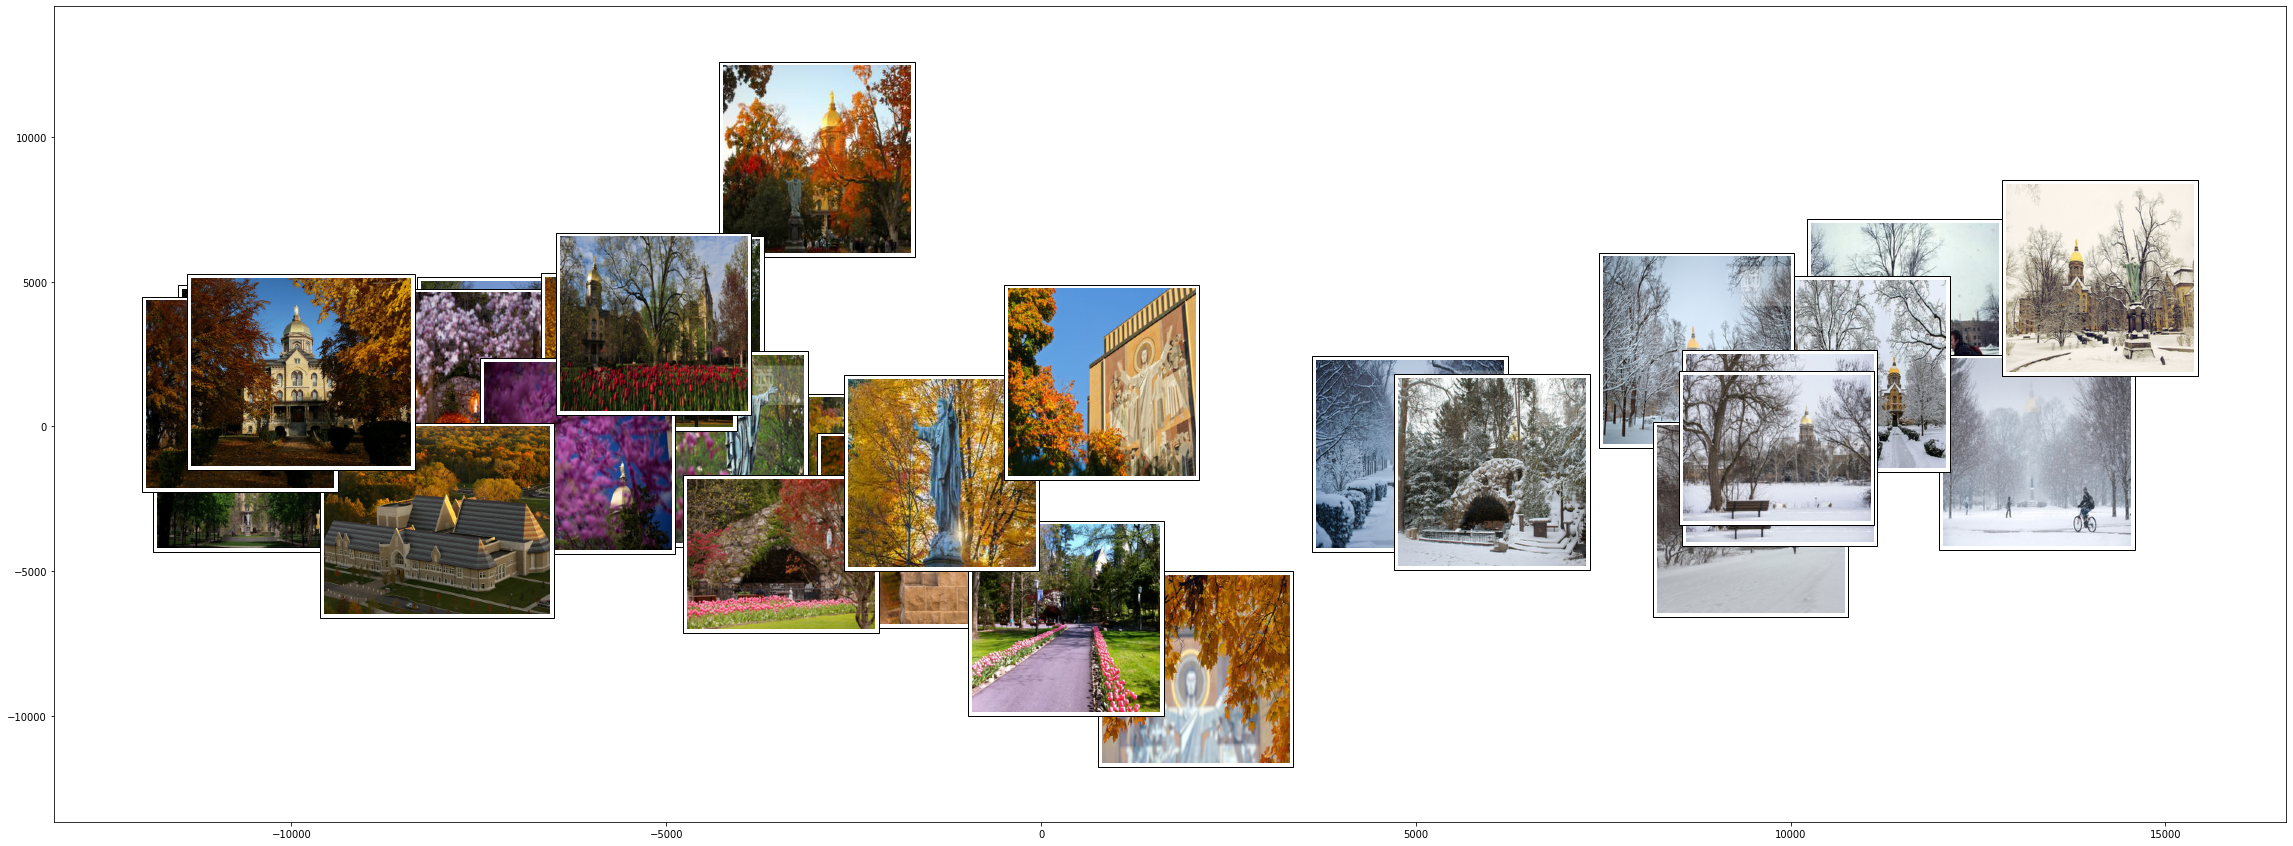

In [258]:
PCA_ImageSpaceVisualization(imgs)

**Conclusions**

Γενικά, αφού οι εικόνες αναπαρίστανται με τη μορφή RGB, οι ομαδοποιήσεις έχουν να κάνουν με τα χρώματα που περιλαμβάνουν οι εικόνες.

1.2.1. Οι εικόνες που βρίσκονται κοντά στο χώρο του plot, είχαν κοντινές συντεταγμένες, δηλαδή κύριες συνιστώσες, άρα περιείχαν κοινά ή κοντινά χρώματα.

   Αντίθετα, όταν δύο εικόνες απέχουν πολύ, έχουν σημαντική διαφορά στις συντεταγμένες των κύριων συνιστωσών τους, άρα και στα χρώματά τους.

   Δεν θα μπορούσαμε να γενικεύσουμε αυτά τα συμπεράσματα για τον αρχικό χώρο των εικόνων ο οποίος είναι πολύ
    μεγάλης διάστασης, καθώς είναι πολύ μεγάλος και τα αποτελέσματα ενδέχεται να έχουν μεγάλες διαφορές.

1.2.2. Οι εικόνες που αντιστοιχούν σε μία από τις εποχές τείνουν να ομαδοποιούνται πιο κοντά
από ότι οι υπόλοιπες, καθώς αφού είναι εικόνες φύσης, τα χρώματα μοιάζουν αρκετά στις φωτογραφίες των ίδιων εποχών.

1.3.

1.3.1. Η ακρίβεια ταξινόμησης ορίζεται μαθηματικά με τους τύπους:

Ακρίβεια = πλήθος σωστών προβλέψεων / συνολικό πλήθος προβλέψεων

ή

Ακρίβεια = (Αληθείς Θετικές + Αληθείς Αρνητικές) / (Αληθείς Θετικές + Αληθείς Αρνητικές + Ψευδείς Θετικές + Ψευδείς Αρνητικές)

1.3.2.A. Testing initial sized images

In [259]:
kf = KFold(n_splits=5, shuffle=False)

knn = KNeighborsClassifier(n_neighbors=1)
svm = SVC(C=1, gamma=1, kernel='linear')

nn_accuracy=0
svm_accuracy=0

for train_index, test_index in kf.split(imgs):
    x_train, x_test = imgs[train_index], imgs[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    sc = StandardScaler()
    sc.fit(x_train)

    X_train_std = sc.transform(x_train)
    X_test_std = sc.transform(x_test)

    # 1-NN
    knn.fit(X_train_std, y_train)
    y_pred = knn.predict(X_test_std)
    nn_accuracy += accuracy_score(y_test,y_pred)

    #SVM
    svm.fit(X_train_std, y_train)
    y_pred = svm.predict(X_test_std)
    svm_accuracy += accuracy_score(y_test,y_pred)

print("1-NN accuracy:"+str(nn_accuracy/5)) #5 splits
print("SVM accuracy:"+str(svm_accuracy/5)) #5 splits

1-NN accuracy:0.7
SVM accuracy:0.8


1.3.2.B. Testing images with PCA

In [260]:
pca = PCA(n_components=1).fit(imgs)
components = pca.transform(imgs)

nn_accuracy=0
svm_accuracy=0

for train_index, test_index in kf.split(components):
    x_train, x_test = components[train_index], components[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    sc = StandardScaler()
    sc.fit(x_train)

    X_train_std = sc.transform(x_train)
    X_test_std = sc.transform(x_test)

    # 1-NN
    knn.fit(X_train_std, y_train)
    y_pred = knn.predict(X_test_std)
    nn_accuracy += accuracy_score(y_test,y_pred)

    #SVM
    svm.fit(X_train_std, y_train)
    y_pred = svm.predict(X_test_std)
    svm_accuracy += accuracy_score(y_test,y_pred)

print("1-NN accuracy:"+str(nn_accuracy/5)) #5 splits
print("SVM accuracy:"+str(svm_accuracy/5)) #5 splits

1-NN accuracy:0.6333333333333333
SVM accuracy:0.7666666666666667


1.3.3. Παρατηρώ ότι ο 1-Νearest Νeighbour έχει μεγαλύτερη ακρίβεια για μικρό αριθμό components, και όσο αυξάνονται τα components, η ακρίβεια μειώνεται. Αντίθετα, ο Linear Support Vector Machine, έχει μεγαλύτερη ακρίβεια όσο αυξάνονται τα components (είχε τη μεγαλύτερη ακρίβεια για 10 components, περίπου 0.8).

1.3.4. Παρατηρώ ότι o Linear Support Vector Machine αποδίδει καλύτερα από τον 1-Nearest Neighbour και στην αρχική και στη μειωμένη διάσταση, συγκρίνοντας τα βέλτιστα αποτελέσματά τους.

**Question 2**

In [261]:
def frobenius_norm(X,W,C,l):
	error = LA.norm(X - np.dot(W, C) + l * LA.norm(W) + l * LA.norm(C))
	return error

def update_c(X,W,C):
  numerator = np.dot(W.T, X)
  denominator = np.dot(W.T.dot(W), C )
  C *= numerator
  C /= denominator
  return C

def update_w(X,W,C):
  numerator = X.dot(C.T)
  denominator = W.dot(C.dot(C.T))
  W *= numerator
  W /= denominator
  return W

In [262]:
def RegNMF(X,k,l,epsilon):
    max_iter = 500
    X_dim, samples = X.shape

    W = np.random.random((X_dim, k))
    C = np.random.random((k, samples))
    frob_error = np.zeros(max_iter)

    for i in range(max_iter):
        wNew=update_w(X,W,C)
        cNew=update_c(X,W,C)
        frob_error[i] = frobenius_norm(X,wNew,cNew,l)

        if abs(frob_error[i]-frob_error[i-1]) < epsilon and i>0:
            break

    return C,W,i

In [263]:
#create array
X = np.random.rand(500, 1000)
X = abs(X)

#choose best lambda
lambdaRange = [0.01,0.1,1,10,100,1000]
ridgeCv = RidgeCV(alphas=lambdaRange, fit_intercept=True, normalize=True)
ridgeCv.fit(X, X)
l = ridgeCv.alpha_

epsilonRange=[0.1, 0.01, 0.001]
kRange=[1, 10, 100]

Comparing different 'k's and 'epsilon's

In [264]:
print("lambda=",str(l))
for k in kRange:
    for epsilon in epsilonRange:
        C,W,i = RegNMF(X, k, l, epsilon)
        print("e="+str(epsilon)+", k="+str(k)+", iterations: "+str(i))

lambda= 0.01
e=0.1, k=1, iterations: 1
e=0.01, k=1, iterations: 2
e=0.001, k=1, iterations: 2
e=0.1, k=10, iterations: 23
e=0.01, k=10, iterations: 25
e=0.001, k=10, iterations: 499
e=0.1, k=100, iterations: 134
e=0.01, k=100, iterations: 147
e=0.001, k=100, iterations: 149


**Conclusions:**

  Παρατηρώ ότι ο αλγόριθμος βρίσκει γρηγορότερα βέλτιστη λύση όσο μικραίνει το k και όσο μεγαλώνει το ε.

  Για k=1 ο αλγόριθμος τερματίζει αμέσως, ενώ για e=0.001 γίνονται οι περισσότερες επαναλήψεις, και με κ=10 και ελάχιστο ε, ο αλγόριθμος δεν βρίσκει λύση.

  (Χρησιμοποιούνται σαν όριο 500 επαναλήψεις.)